In [1]:
#TITLE: Fresno Ag

#SUMMARY: The following code focuses on agriculture in one of California's most productive
#agricultural region, Fresno County. It uses crop mapping data from the California
#Department of Water Resources. The first year of data collection is 2014 and the latest year
#is 2019. It first focuses on California as a State before moving to Fresno County specifically. 
#if there are any questions or concerns, feel free to email Matt Woolf at mattcharleswoolf@gmail.com.

#Import necessary packages

#Allows for reading of geospatial data
import geopandas as gpd
#Allows for interesting visualizations
import matplotlib
#Allows for mathematical operations
import numpy as np
#Allows for plotting
import matplotlib.pyplot as plt
#Allows for creation of GIFs
import imageio
#Reads csv file
import pandas as pd


In [2]:
#Reading the 2014 data
df2014 = gpd.read_file('/Users/MattWoolf/Desktop/CropMapping2014/i15_Crop_Mapping_2014.shx')

#Getting count of unique values
#df2014['Crop2014'].value_counts()
df2014

OBJECTID                      Crop2014       Acres       County  \
0              1                  Strawberries    0.859105   Santa Cruz   
1              2            Peaches/Nectarines    3.354826       Tulare   
2              3  Alfalfa and Alfalfa Mixtures   76.358184     Imperial   
3              4                        Grapes   43.474109       Fresno   
4              5                      Tomatoes  150.998020       Sutter   
...          ...                           ...         ...          ...   
361018    361019                        Grapes   36.725859         Kern   
361019    361020                          Idle    3.289471       Amador   
361020    361021              Young Perennials   11.660130    San Diego   
361021    361022                     Safflower   24.352621  San Joaquin   
361022    361023              Young Perennials    1.155844      Ventura   

       Comments        Source    Modified_B  Date_Data_  Last_Modif  \
0          None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
1          None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
2          None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
3          None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
4          None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
...         ...           ...           ...         ...         ...   
361018     None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
361019     None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
361020     None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
361021     None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
361022     None  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   

                               DWR_Standa    Shape__Are   Shape__Len  \
0       T | TRUCK NURSERY AND BERRY CROPS  5.444932e+03   346.315553   
1           D | DECIDUOUS FRUITS AND NUTS  2.107371e+04   866.351259   
2                             P | PASTURE  4.381355e+05  2797.911596   
3                            V | VINEYARD  2.747498e+05  2256.858669   
4       T | TRUCK NURSERY AND BERRY CROPS  1.008462e+06  3969.590928   
...                                   ...           ...          ...   
361018                       V | VINEYARD  2.254024e+05  2378.688338   
361019                           I | IDLE  2.177587e+04   618.825910   
361020                Y | YOUNG PERENNIAL  6.795769e+04  2351.732032   
361021                    F | FIELD CROPS  1.576561e+05  2024.309614   
361022                Y | YOUNG PERENNIAL  6.889444e+03   602.569695   

                                                 geometry  
0       POLYGON Z ((-13559740.612 4423308.341 0.000, -...  
1       POLYGON Z ((-13296569.340 4375304.441 0.000, -...  
2       POLYGON Z ((-12834521.216 3862431.311 0.000, -...  
3       POLYGON Z ((-13355020.096 4407864.075 0.000, -...  
4       POLYGON Z ((-13546609.904 4697150.316 0.000, -...  
...                                                   ...  
361018  POLYGON Z ((-13278489.526 4247955.449 0.000, -...  
361019  POLYGON Z ((-13447428.727 4652127.378 0.000, -...  
361020  MULTIPOLYGON Z (((-13057948.328 3954852.961 0....  
361021  POLYGON Z ((-13501187.932 4536202.659 0.000, -...  
361022  POLYGON Z ((-13230434.600 4084377.023 0.000, -...  

[361023 rows x 13 columns]

In [23]:
df2014.head()

OBJECTID                      Crop2014       Acres      County Comments  \
0         1                  Strawberries    0.859105  Santa Cruz     None   
1         2            Peaches/Nectarines    3.354826      Tulare     None   
2         3  Alfalfa and Alfalfa Mixtures   76.358184    Imperial     None   
3         4                        Grapes   43.474109      Fresno     None   
4         5                      Tomatoes  150.998020      Sutter     None   

         Source    Modified_B  Date_Data_  Last_Modif  \
0  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
1  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
2  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
3  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   
4  Land IQ, LLC  Zhongwu Wang  July, 2014  2017-05-07   

                          DWR_Standa    Shape__Are   Shape__Len  \
0  T | TRUCK NURSERY AND BERRY CROPS  5.444932e+03   346.315553   
1      D | DECIDUOUS FRUITS AND NUTS  2.107371e+04   866.351259   
2                        P | PASTURE  4.381355e+05  2797.911596   
3                       V | VINEYARD  2.747498e+05  2256.858669   
4  T | TRUCK NURSERY AND BERRY CROPS  1.008462e+06  3969.590928   

                                            geometry  
0  POLYGON Z ((-13559740.612 4423308.341 0.000, -...  
1  POLYGON Z ((-13296569.340 4375304.441 0.000, -...  
2  POLYGON Z ((-12834521.216 3862431.311 0.000, -...  
3  POLYGON Z ((-13355020.096 4407864.075 0.000, -...  
4  POLYGON Z ((-13546609.904 4697150.316 0.000, -...

In [3]:
#Reading/evaluating the 2019 data
df2019 = gpd.read_file('/Users/MattWoolf/Desktop/CropMapping2019/i15_Crop_Mapping_2019.shx')

#Getting count of unique values
#df2019['IRR_TYP2PB'].value_counts()
df2019['MAIN_CROP'].value_counts()

V      69681
D12    40875
X      36044
C      29296
P3     23122
D13    19155
G6     18916
C5     15173
P1     14960
F16    14844
R1      9946
T18     9841
T16     9557
D14     7960
YP      7622
T30     7532
D5      6929
P6      5547
T4      4799
C6      4666
T15     4480
P4      4295
D16     4106
T20     3978
F1      3884
G2      3784
D10     3646
T19     3190
D3      2952
T9      1759
U       1609
D1      1598
T27     1512
T31     1368
C4      1235
T10     1140
C7      1089
T6      1042
F12     1019
F10     1014
D15      870
D8       818
F2       795
T21      721
D6       715
F11      586
R2       491
C8       489
C10      321
T12      128
C3        10
D          4
P          3
P7         3
T17        2
C2         1
Name: MAIN_CROP, dtype: int64

In [9]:
#Clearly, the 2014 data is written in crop names (example: "Strawberries") whereas the 
#2019 data is written in crop codes (example: "C" for citrus). In order to standardize
#crop categories, we replace these codes with crop names.

df2019 = df2019.replace({
    'V': 'Grapes',
    'D12':'Almonds',
    'D13':'Walnuts',
    'G6':'Miscellaneous Grain and Hay',
    'C5':'Avocados',
    'P1':'Alfalfa and Alfalfa Mixtures',
    'R1':'Rice',
    'T16':'Flowers, Nursery and Christmas Tree Farms',
    'D14':'Pistachios',
    'D5':'Peaches/Nectarines',
    'P6':'Miscellaneous Grasses',
    'T4':'Cole Crops',
    'C6':'Olives',
    'T15':'Tomatoes',
    'T20':'Strawberries',
    'F1':'Cotton',
    'G2':'Wheat',
    'D10':'Miscellaneous Deciduous',
    'T19':'Bush Berries',
    'D3':'Cherries',
    'T9':'Melons, Squash and Cucumbers',
    'U':'Urban',
    'D1':'Apples',
    'T27':'Greenhouse',
    'C4':'Dates',
    'T10':'Onions and Garlic',
    'C7':'Miscellaneous Subtropical Fruits',
    'T6':'Carrots',
    'F12':'Sunflowers',
    'F10':'Beans (Dry)',
    'D15':'Pomegranates',
    'F2':'Safflower',
    'T21':'Peppers',
    'D6':'Pears',
    'R2':'Wild Rice',
    'C8':'Kiwis',
    'C':'Citrus',
    'C10':'Eucalyptus',
    'C2':'Lemons',
    'C3':'Oranges',
    'D':'Deciduous',
    'D16':'Plums, Prunes or Apricots',
    'D8':'Prunes',
    'F11':'Miscellaneous field',
    'F16':'Corn, Sorghum, or Sudan',
    'P':'Pasture',
    'P3':'Mixed pasture',
    'P4':'Native pasture',
    'P7':'Turf farms',
    'T12':'Potatoes',
    'T17':'Mixed (four or more)',
    'T18':'Miscellanous truck',
    'T30':'Lettuce or leafy greens',
    'T31':'Potato or sweet potato',
    'X':'Unclassified fallow',
    'YP':'Young Perrenial'
  }
)

#Examine the data after changes above
df2019['County'].values_counts()

KeyError: 'County'

Text(0.5, 0, 'Crop')

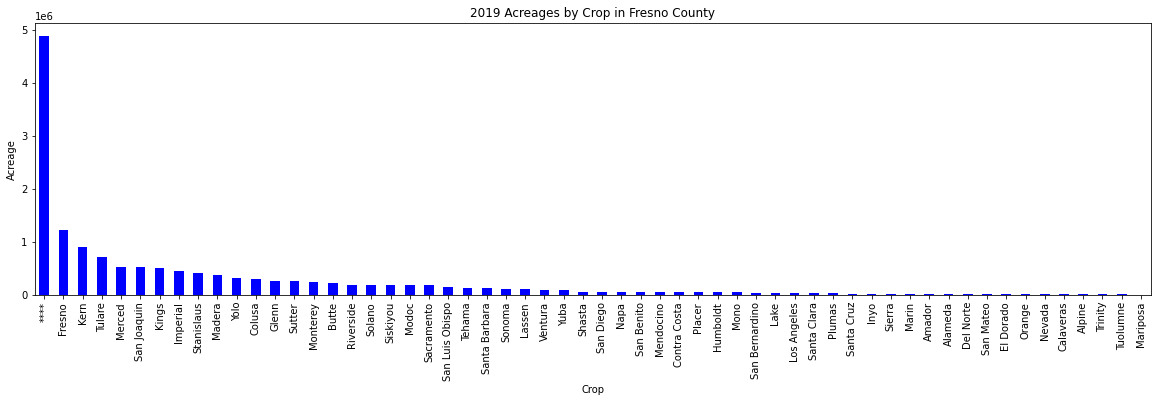

In [8]:
#Create 2019 barchart for Fresno County
df2019_acres = df2019[['COUNTY','ACRES']].groupby('COUNTY').sum().sort_values('ACRES', ascending=False)
df2019_acres.plot.bar(figsize = (20,5), color='green', legend=False)
plt.title('2019 Acreages by County in California')
plt.ylabel('Acreage')
plt.xlabel('Crop')


In [130]:
df2019.columns

Index(['OBJECTID', 'UniqueID', 'DWR_REVISE', 'SYMB_CLASS', 'MULTIUSE',
       'CLASS1', 'SUBCLASS1', 'SPECOND1', 'IRR_TYP1PA', 'IRR_TYP1PB', 'PCNT1',
       'CLASS2', 'SUBCLASS2', 'SPECOND2', 'IRR_TYP2PA', 'IRR_TYP2PB', 'PCNT2',
       'CLASS3', 'SUBCLASS3', 'SPECOND3', 'IRR_TYP3PA', 'IRR_TYP3PB', 'PCNT3',
       'CLASS4', 'SUBCLASS4', 'SPECOND4', 'IRR_TYP4PA', 'IRR_TYP4PB', 'PCNT4',
       'UCF_ATT', 'CROPTYP1', 'ADOY1', 'CROPTYP2', 'ADOY2', 'CROPTYP3',
       'ADOY3', 'CROPTYP4', 'ADOY4', 'EMRG_CROP', 'REGION', 'ACRES', 'COUNTY',
       'LIQ_REPORT', 'MAIN_CROP', 'MAIN_CROP_', 'Shape__Are', 'Shape__Len',
       'geometry'],
      dtype='object')

In [262]:
#Create color list for plotting
colors = ['gray', 'orange', 'whitesmoke',
         'cyan', 'purple', 'red']

In [255]:
df2019=df2019[(df2019['COUNTY'] == "Fresno")|(df2019['COUNTY'] == "Kings")|
             (df2019['COUNTY'] == 'Madera')|(df2019['COUNTY'] == 'Tulare')|
             (df2019['COUNTY'] == 'Kern')]

In [256]:
df2014.head()

OBJECTID            Crop2014      Acres  County Comments        Source  \
1          2  Peaches/Nectarines   3.354826  Tulare     None  Land IQ, LLC   
3          4              Grapes  43.474109  Fresno     None  Land IQ, LLC   
7          8              Grapes  93.723265  Fresno     None  Land IQ, LLC   
8          9         Beans (Dry)  10.776612  Tulare     None  Land IQ, LLC   
10        11                Idle   2.067688    Kern     None  Land IQ, LLC   

      Modified_B  Date_Data_  Last_Modif                     DWR_Standa  \
1   Zhongwu Wang  July, 2014  2017-05-07  D | DECIDUOUS FRUITS AND NUTS   
3   Zhongwu Wang  July, 2014  2017-05-07                   V | VINEYARD   
7   Zhongwu Wang  July, 2014  2017-05-07                   V | VINEYARD   
8   Zhongwu Wang  July, 2014  2017-05-07                F | FIELD CROPS   
10  Zhongwu Wang  July, 2014  2017-05-07                       I | IDLE   

       Shape__Are   Shape__Len  \
1    21073.707288   866.351259   
3   274749.750896  2256.858669   
7   588559.373632  3207.406009   
8    67079.963185  1023.593944   
10   12617.384842   996.328260   

                                             geometry  
1   POLYGON Z ((-13296569.340 4375304.441 0.000, -...  
3   POLYGON Z ((-13355020.096 4407864.075 0.000, -...  
7   POLYGON Z ((-13331506.862 4374173.298 0.000, -...  
8   POLYGON Z ((-13290225.035 4325672.239 0.000, -...  
10  POLYGON Z ((-13272310.022 4216610.599 0.000, -...

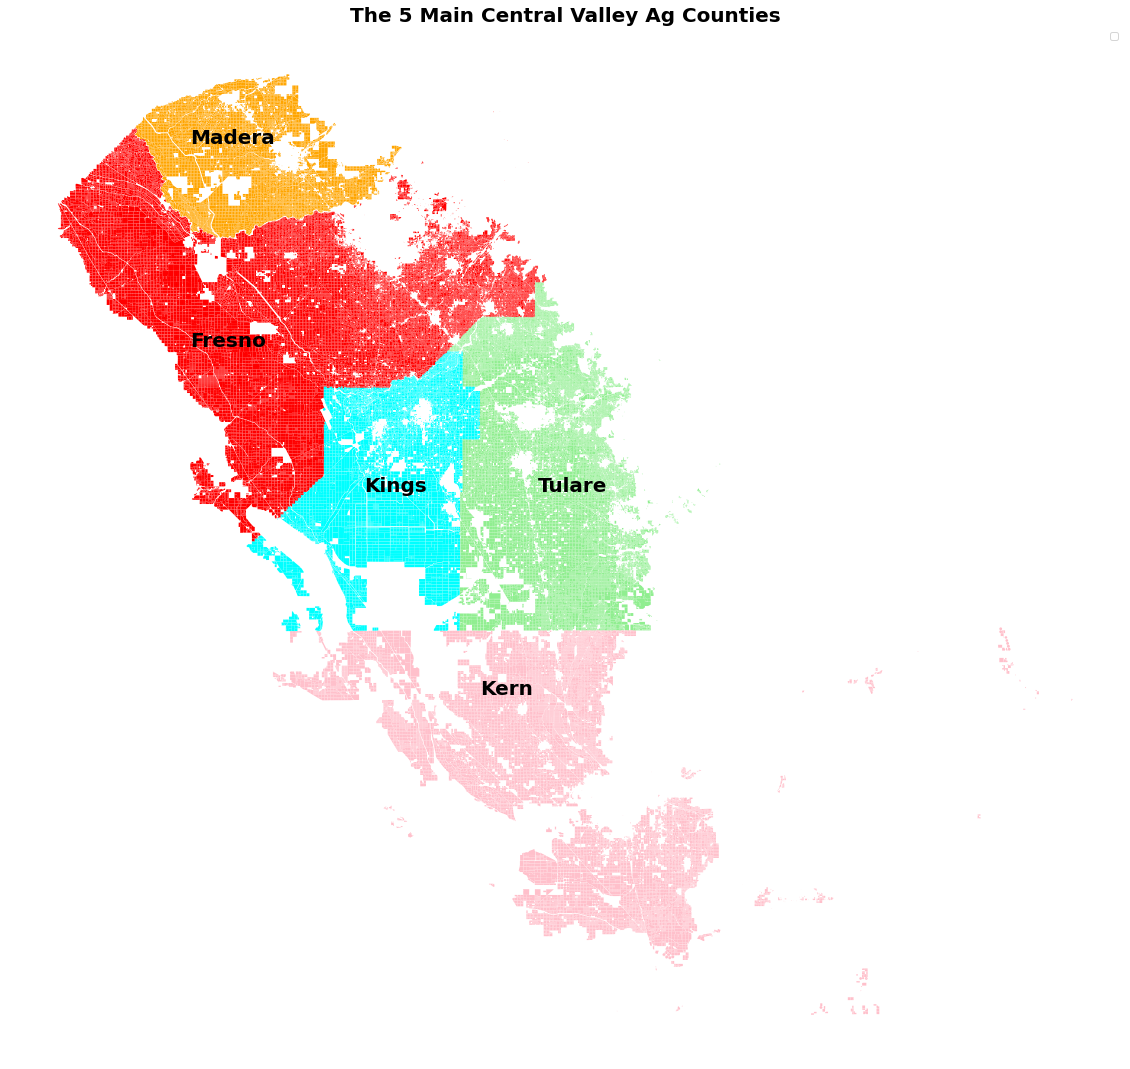

In [67]:
#Plot 2014 crop map using the colors in colors
df2014.plot(column='County', categorical=True, legend=True, figsize=(20,20), 
            cmap=matplotlib.colors.ListedColormap(colors))

plt.title("The 5 Main Central Valley Ag Counties", fontsize=20, weight='bold', color='black')
plt.text(-1.34e7, 4.37e6, "Fresno", fontsize=20, weight='bold', color='black')
plt.text(-1.34e7, 4.44e6, "Madera", fontsize=20, weight='bold', color='black')
plt.text(-1.33e7, 4.25e6, "Kern", fontsize=20, weight='bold', color='black')
plt.text(-1.334e7, 4.32e6, "Kings", fontsize=20, weight='bold', color='black')
plt.text(-1.328e7, 4.32e6, "Tulare", fontsize=20, weight='bold', color='black')

plt.axis('off')
plt.legend('off')

In [8]:
pip install contextily

     |████████████████████████████████| 55 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 119 kB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 438 kB/s eta 0:00:01
     |████████████████████████████████| 40 kB 8.5 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


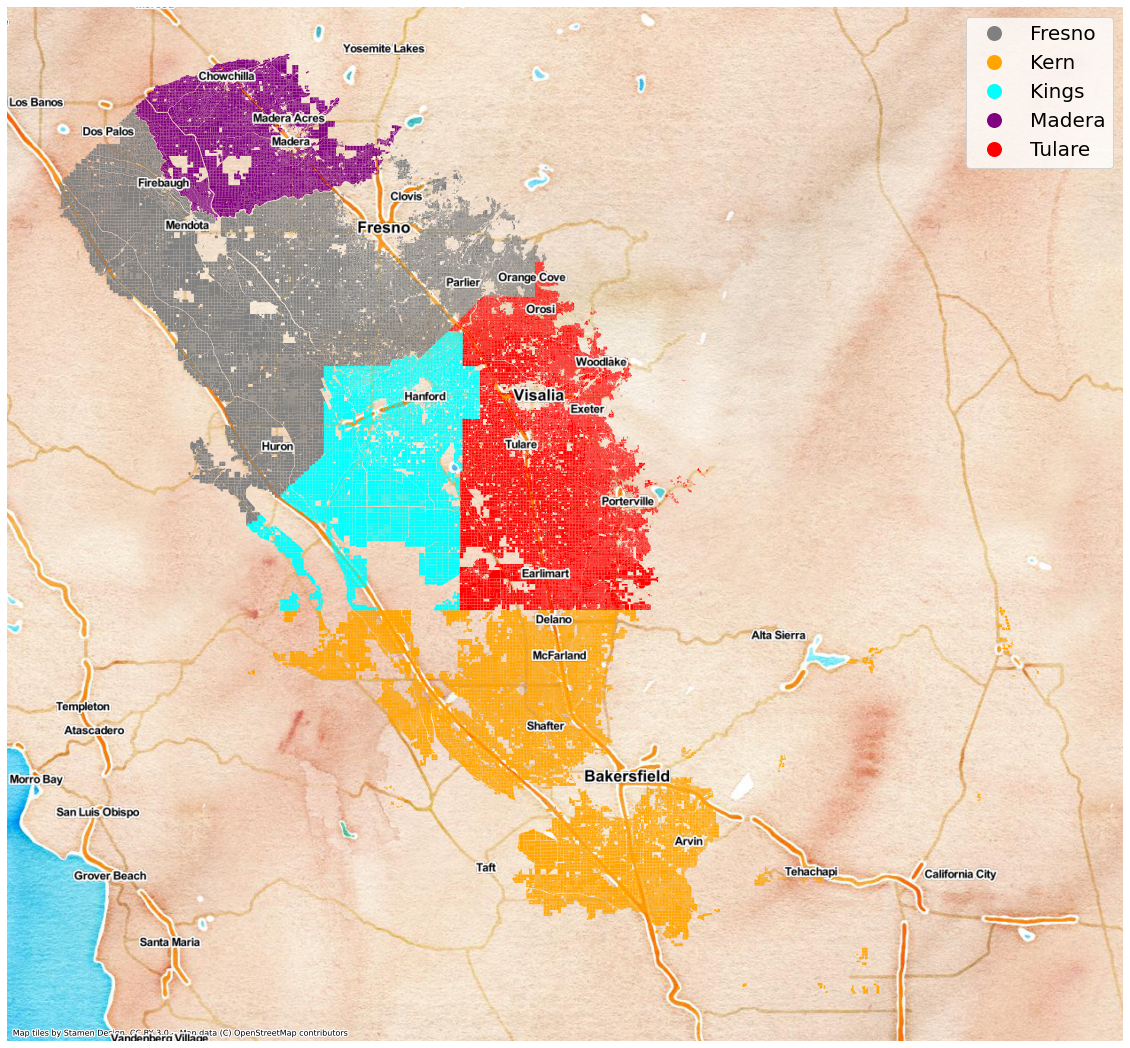

In [263]:
import contextily as cx

df2019 = df2019.to_crs(epsg=3857)

ax = df2019.plot(column='COUNTY', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors))
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.rc('legend', fontsize=20, markerscale=1.5)


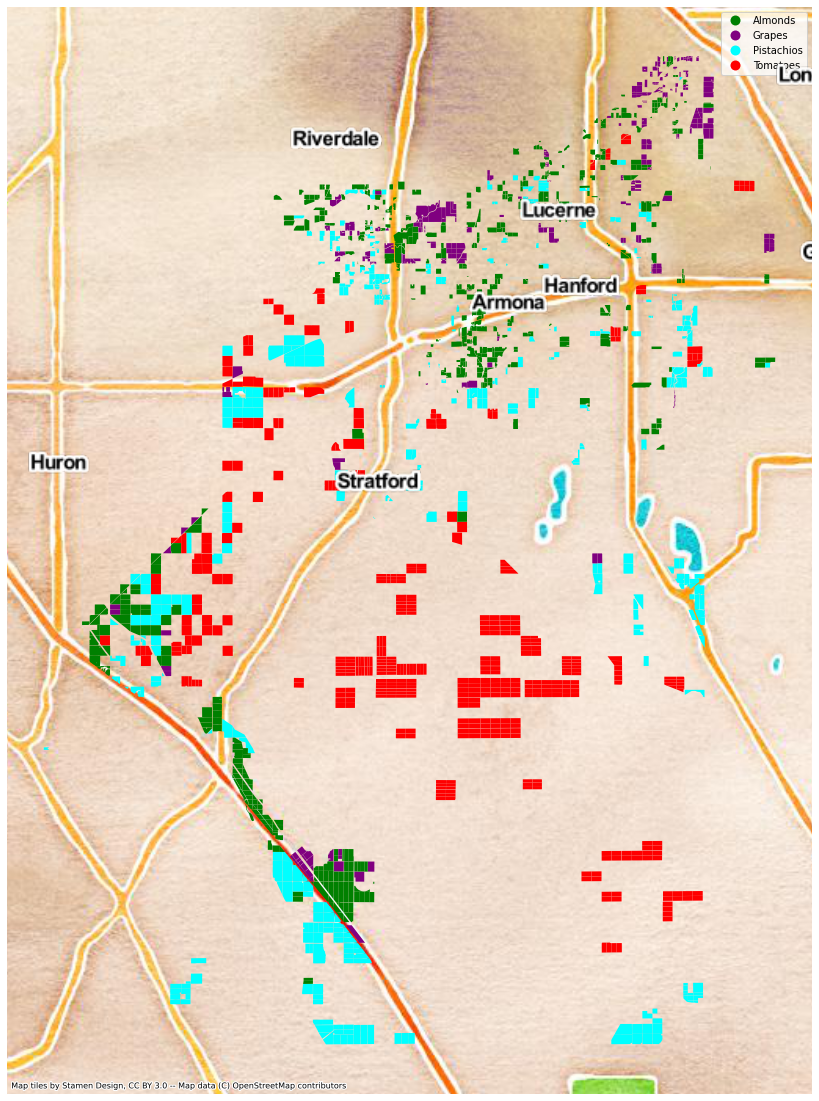

In [5]:
import contextily as cx

colors1 = ['green', 'purple', 'cyan', 'red']

df_kings_2014=df2014[(df2014['County'] == "Kings")]

df_kings_2014=df_kings_2014[(df_kings_2014['Crop2014'] == "Almonds")|(df_kings_2014['Crop2014'] == 'Pistachios')|
                      (df_kings_2014['Crop2014'] == 'Tomatoes')|(df_kings_2014['Crop2014'] == 'Grapes')]
    
df_kings_2014 = df_kings_2014.to_crs(epsg=3857)

ax = df_kings_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1))
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.rc('legend', fontsize=20, markerscale=1.5)

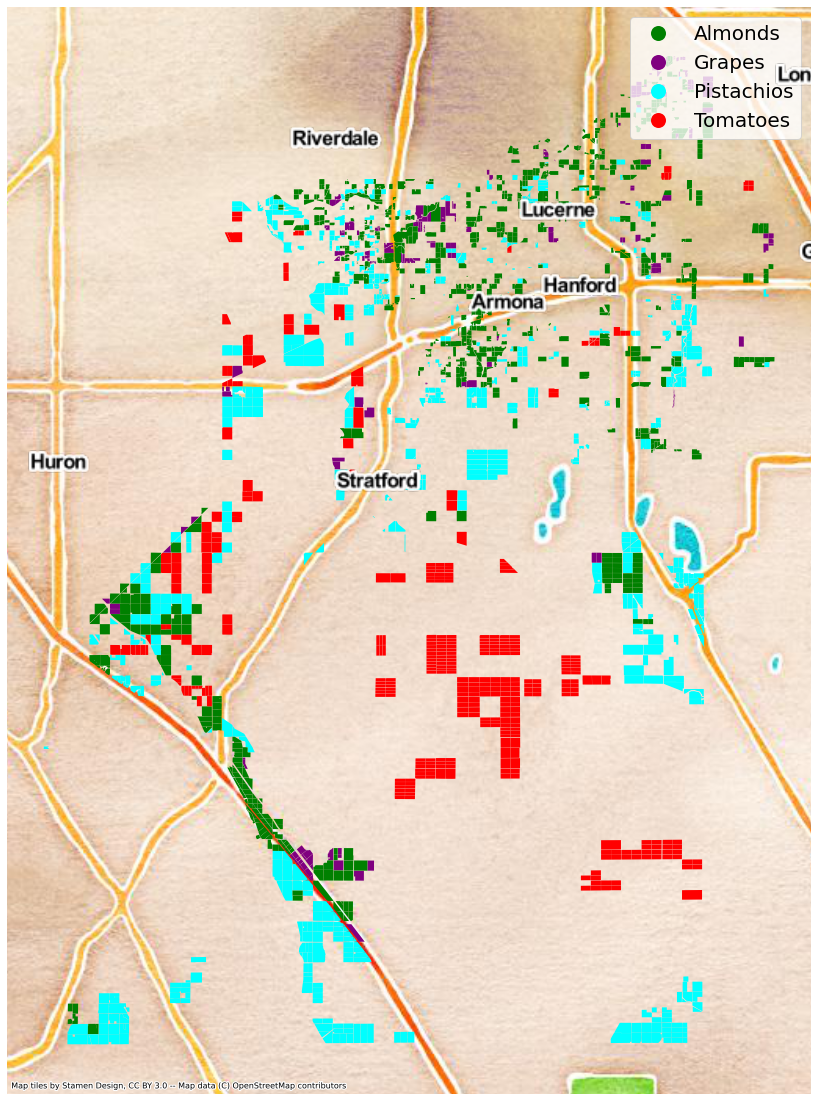

In [6]:
colors1 = ['green', 'purple', 'cyan', 'red']

df_kings_2019=df2019[(df2019['COUNTY'] == "Kings")]

df_kings_2019=df_kings_2019[(df_kings_2019['MAIN_CROP'] == "Almonds")|(df_kings_2019['MAIN_CROP'] == 'Pistachios')|
                      (df_kings_2019['MAIN_CROP'] == 'Tomatoes')|(df_kings_2019['MAIN_CROP'] == 'Grapes')]

df_kings_2019 = df_kings_2019.to_crs(epsg=3857)

ax = df_kings_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                cmap=matplotlib.colors.ListedColormap(colors1))
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.axis('off')
plt.rc('legend', fontsize=20, markerscale=1.5)

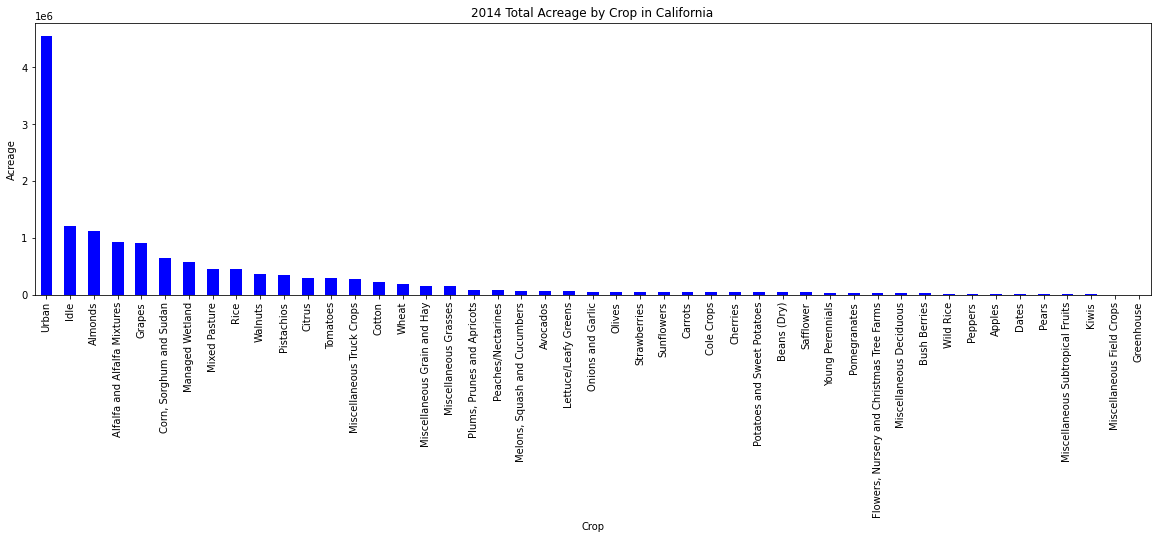

In [8]:
#Create bar charts for 2014 crops in descending order
crop_areas2014 = df2014[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_areas2014.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2014 Total Acreage by Crop in California')
plt.ylabel('Acreage')
plt.xlabel('Crop')
plt.savefig('/Users/MattWoolf/Desktop/californiabar2019.png', dpi=100)

Text(0.5, 0, 'Crop')

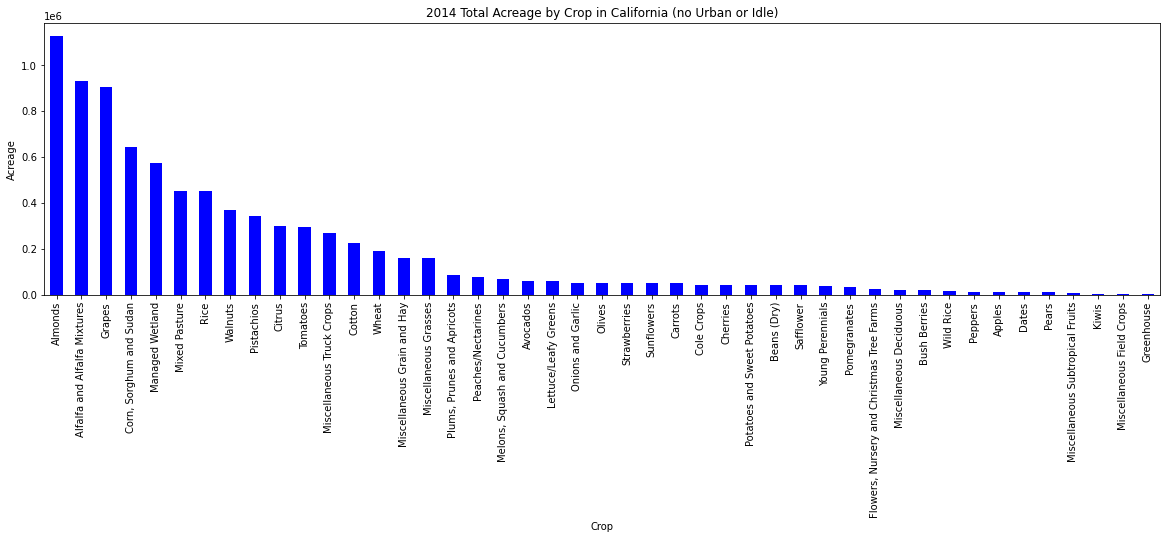

In [9]:
#Clearly, parcel use for 'Urban' is the largest in terms of acreage. Since we are 
#interested in crops rather than urban uses of land or idle areas, we drop 'Urban' and 'Idle'
df2014 = df2014[df2014.Crop2014 != 'Urban']
df2014 = df2014[df2014.Crop2014 != 'Idle']

#Create bar charts for 2014 crops in descending order without Urban category
crop_areas2014 = df2014[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_areas2014.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2014 Total Acreage by Crop in California (no Urban or Idle)')
plt.ylabel('Acreage')
plt.xlabel('Crop')

Text(0.5, 0, 'Crop')

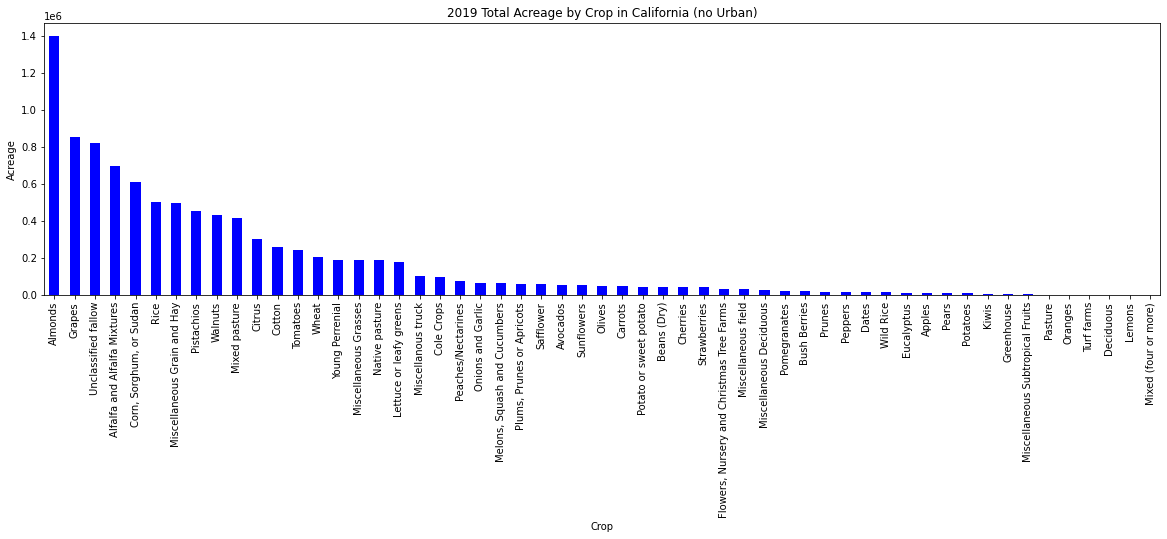

In [10]:
#We do the same for the 2019 data...

df2019 = df2019[df2019.MAIN_CROP != 'Urban']
crop_areas2019 = df2019[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_areas2019.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2019 Total Acreage by Crop in California (no Urban)')
plt.ylabel('Acreage')
plt.xlabel('Crop')

In [229]:
#Though it is interested to examine the data at the state level, it can be overwhelming.
#Examining the data on the county level and even crop level can likely lead us to better 
#insights. We start by looking at 2014 crop data for only Fresno county.

df_fresno_2014=df2014[df2014.County == "Fresno"]
df_fresno_2014.head()

NameError: name 'df2014' is not defined

In [12]:
#And then we do the same for the 2019 data. 
df_fresno_2019=df2019[df2019.COUNTY == "Fresno"]
df_fresno_2019.head()

OBJECTID UniqueID DWR_REVISE           SYMB_CLASS MULTIUSE CLASS1  \
195238    195239  1027399          *            Deciduous        S     **   
195239    195240  1027506          *            Deciduous        S     **   
195240    195241  1027510          *            Deciduous        S     **   
195241    195242  1027520          *            Deciduous        S     **   
195242    195243  1027487          *  Unclassified fallow        S     **   

       SUBCLASS1 SPECOND1 IRR_TYP1PA IRR_TYP1PB  ... EMRG_CROP REGION  \
195238        **        *          *          *  ...      ****   SCRO   
195239        **        *          *          *  ...      ****   SCRO   
195240        **        *          *          *  ...      ****   SCRO   
195241        **        *          *          *  ...      ****   SCRO   
195242        **        *          *          *  ...      ****   SCRO   

            ACRES  COUNTY           LIQ_REPORT            MAIN_CROP  \
195238  22.061916  Fresno  D13  **** **** ****              Walnuts   
195239   8.826006  Fresno  D13  **** **** ****              Walnuts   
195240   6.896737  Fresno  D13  **** **** ****              Walnuts   
195241   2.098888  Fresno  D13  **** **** ****              Walnuts   
195242   3.071160  Fresno  X    **** **** ****  Unclassified fallow   

       MAIN_CROP_     Shape__Are   Shape__Len  \
195238        NaN  139363.749540  1656.618808   
195239        NaN   55576.146852   943.239001   
195240        NaN   43568.828120   998.194492   
195241        NaN   13220.507666   666.714248   
195242        NaN   19399.984633   562.162752   

                                                 geometry  
195238  POLYGON Z ((-13433615.251 4405704.528 0.000, -...  
195239  POLYGON Z ((-13340790.818 4388246.261 0.000, -...  
195240  POLYGON Z ((-13434514.503 4406030.665 0.000, -...  
195241  POLYGON Z ((-13330637.180 4390016.899 0.000, -...  
195242  POLYGON Z ((-13341088.947 4405460.367 0.000, -...  

[5 rows x 48 columns]

(-13453940.904375002,
 -13268434.377124999,
 4295167.490289997,
 4458406.529110003)

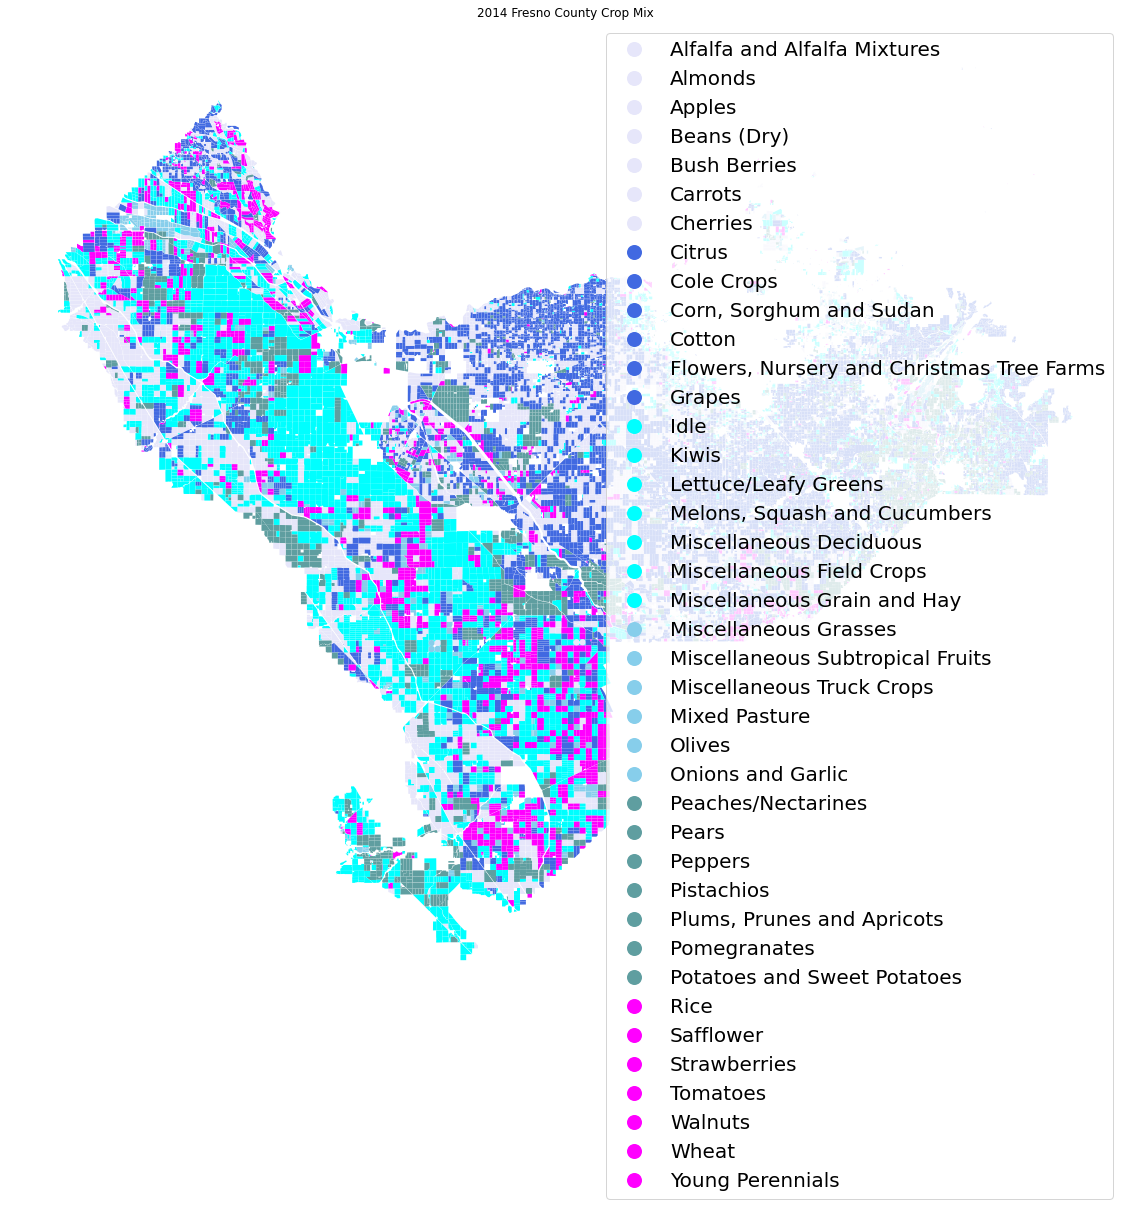

In [127]:
#Plot 2014 crop map for Fresno County
df_fresno_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                   cmap=matplotlib.colors.ListedColormap(colors))

plt.title("2014 Fresno County Crop Mix")
plt.axis('off')


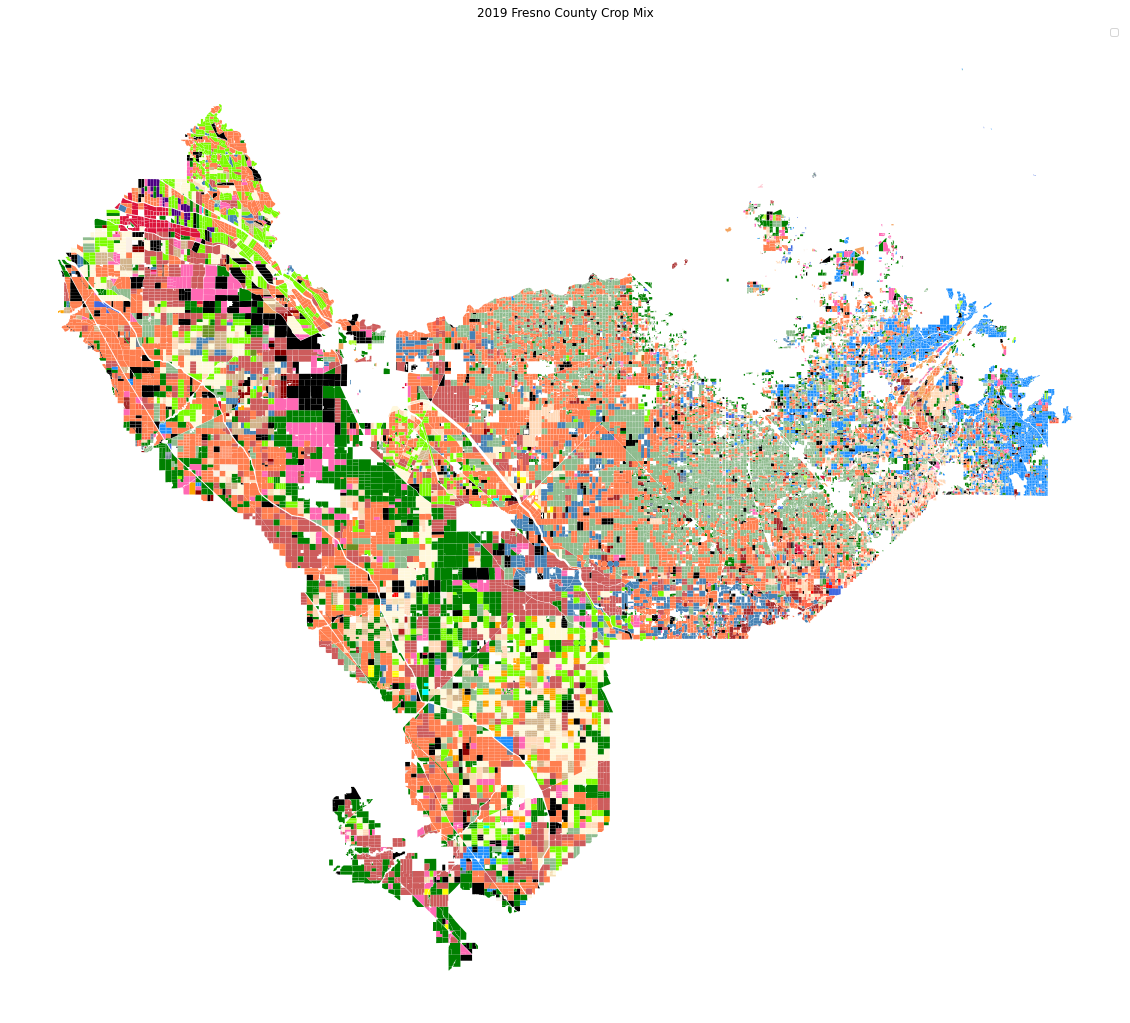

In [14]:
#Plot 2019 crop map for Fresno County
df_fresno_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                   cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2019 Fresno County Crop Mix")
plt.axis('off')
plt.legend('off')
plt.savefig('/Users/MattWoolf/Desktop/fresno2019.png', dpi=100)

Text(0.5, 0, 'Crop')

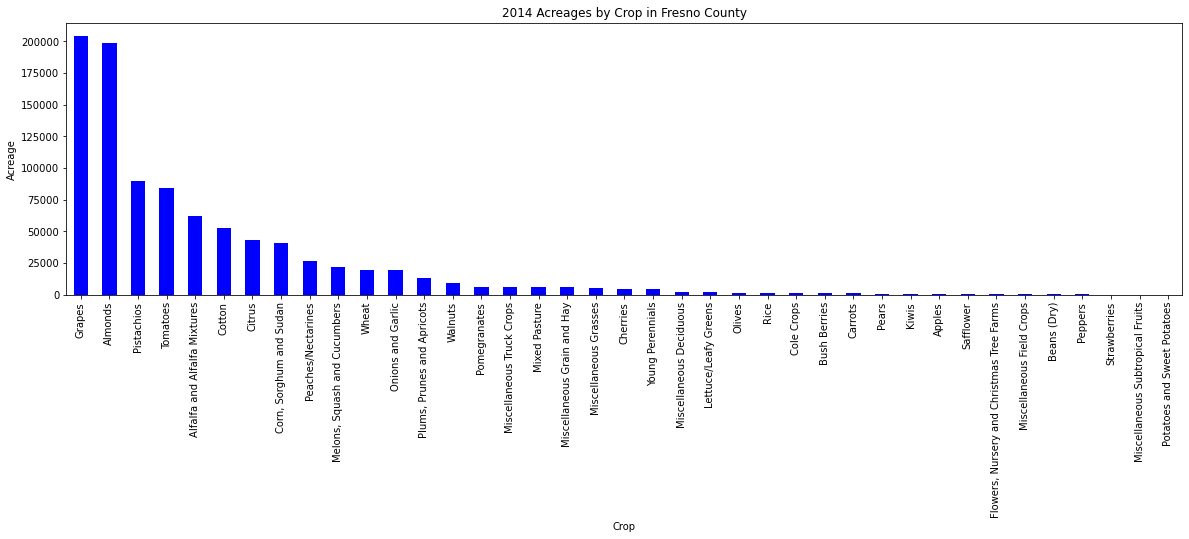

In [15]:
#Create 2014 barchart for Fresno County
crop_acreage_fresno_2014 = df_fresno_2014[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_acreage_fresno_2014.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2014 Acreages by Crop in Fresno County')
plt.ylabel('Acreage')
plt.xlabel('Crop')

Text(0.5, 0, 'Crop')

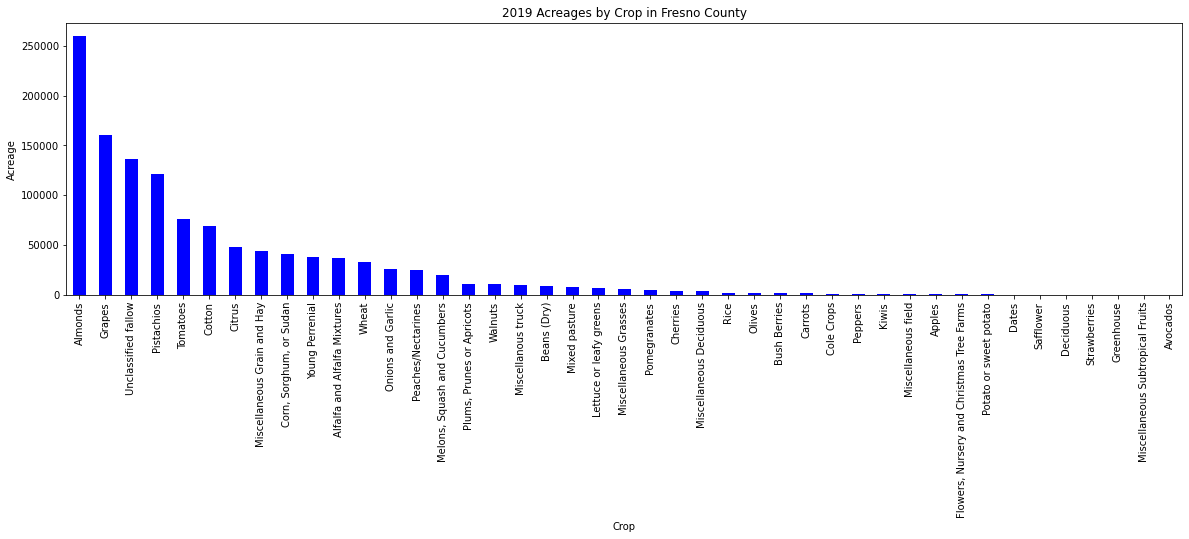

In [16]:
#Create 2019 barchart for Fresno County
crop_acreage_fresno_2019 = df_fresno_2019[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_acreage_fresno_2019.plot.bar(figsize = (20,5), color='blue', legend=False)
plt.title('2019 Acreages by Crop in Fresno County')
plt.ylabel('Acreage')
plt.xlabel('Crop')

In [228]:
#We can even get more specific by focusing on specific crops. The top crops in Fresno County
# as of 2022 are (in descending order) almonds, grapes, tomatoes, cotton. We first focus on
# almonds in 2014 in Fresno County. We save the image as a PNG so we can also create a GIF.
df_fresno_2014_almonds=df_fresno_2014[df_fresno_2014.Crop2014 == "Almonds"]
df_fresno_2014_almonds.plot(column='Crop2014', categorical=True, legend=False, figsize=(20,20), 
                   cmap='magma')
plt.title("2014 Fresno County Almond Acreage", fontsize=30)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/almonds2014.png', dpi=100)

NameError: name 'df_fresno_2014' is not defined

In [19]:
#Create GIF for almonds...
png_list = ['/Users/MattWoolf/Desktop/almonds2014.png', 
            '/Users/MattWoolf/Desktop/almonds2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/almonds.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [22]:
#Create GIF for grapes...
png_list = ['/Users/MattWoolf/Desktop/grapes2014.png', 
            '/Users/MattWoolf/Desktop/grapes2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/grapes.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [25]:
#Create GIF for pistachios...
png_list = ['/Users/MattWoolf/Desktop/pistachios2014.png', 
            '/Users/MattWoolf/Desktop/pistachios2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/pistachios.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [28]:
#Create GIF for tomatoes...
png_list = ['/Users/MattWoolf/Desktop/tomatoes2014.png', 
            '/Users/MattWoolf/Desktop/tomatoes2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/tomatoes.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [31]:
#Create GIF for cotton...
png_list = ['/Users/MattWoolf/Desktop/cotton2014.png', 
            '/Users/MattWoolf/Desktop/cotton2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/cotton.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

In [273]:
#Create GIF for Alfalfa and Alfalfa Mixtures...
png_list = ['/Users/MattWoolf/Desktop/fresno2014.png', 
            '/Users/MattWoolf/Desktop/fresno2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/fresno.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)

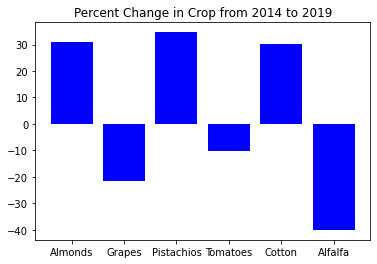

In [36]:
#Find percentage total acreage increase in top selected crops from 2014 to 2019

total_almond_acreage_2014 = df_fresno_2014_almonds[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_almond_acreage_2019 = df_fresno_2019_almonds[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_almonds=100*(total_almond_acreage_2019['ACRES'].astype(int)-total_almond_acreage_2014['Acres'].astype(int))/total_almond_acreage_2014['Acres'].astype(int)
percent_change_almonds['Almonds'].astype(int)

total_grape_acreage_2014 = df_fresno_2014_grapes[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_grape_acreage_2019 = df_fresno_2019_grapes[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_grape=100*(total_grape_acreage_2019['ACRES'].astype(int)-total_grape_acreage_2014['Acres'].astype(int))/total_grape_acreage_2014['Acres'].astype(int)
percent_change_grape['Grapes'].astype(int)

total_grape_acreage_2014 = df_fresno_2014_grapes[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_grape_acreage_2019 = df_fresno_2019_grapes[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_grape=100*(total_grape_acreage_2019['ACRES'].astype(int)-total_grape_acreage_2014['Acres'].astype(int))/total_grape_acreage_2014['Acres'].astype(int)
percent_change_grape['Grapes'].astype(int)

total_pistachio_acreage_2014 = df_fresno_2014_pistachios[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_pistachio_acreage_2019 = df_fresno_2019_pistachios[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_pistachio=100*(total_pistachio_acreage_2019['ACRES'].astype(int)-total_pistachio_acreage_2014['Acres'].astype(int))/total_pistachio_acreage_2014['Acres'].astype(int)
percent_change_pistachio['Pistachios'].astype(int)

total_tomato_acreage_2014 = df_fresno_2014_tomatoes[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_tomato_acreage_2019 = df_fresno_2019_tomatoes[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_tomato=100*(total_tomato_acreage_2019['ACRES'].astype(int)-total_tomato_acreage_2014['Acres'].astype(int))/total_tomato_acreage_2014['Acres'].astype(int)
percent_change_tomato['Tomatoes'].astype(int)

total_cotton_acreage_2014 = df_fresno_2014_cotton[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_cotton_acreage_2019 = df_fresno_2019_cotton[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_cotton=100*(total_cotton_acreage_2019['ACRES'].astype(int)-total_cotton_acreage_2014['Acres'].astype(int))/total_cotton_acreage_2014['Acres'].astype(int)
percent_change_cotton['Cotton'].astype(int)

total_alfalfa_acreage_2014 = df_fresno_2014_alfalfa[['Crop2014', 'Acres']].groupby('Crop2014').sum()
total_alfalfa_acreage_2019 = df_fresno_2019_alfalfa[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum()
percent_change_alfalfa=100*(total_alfalfa_acreage_2019['ACRES'].astype(int)-total_alfalfa_acreage_2014['Acres'].astype(int))/total_alfalfa_acreage_2014['Acres'].astype(int)
percent_change_alfalfa['Alfalfa and Alfalfa Mixtures'].astype(int)

plt.bar('Almonds', percent_change_almonds, color='blue')
plt.bar('Grapes', percent_change_grape, color='blue')
plt.bar('Pistachios', percent_change_pistachio, color='blue')
plt.bar('Tomatoes', percent_change_tomato, color='blue')
plt.bar('Cotton', percent_change_cotton, color='blue')
plt.bar('Alfalfa', percent_change_alfalfa, color='blue')
plt.title('Percent Change in Crop from 2014 to 2019')
plt.savefig('/Users/MattWoolf/Desktop/percentagechanges.png', dpi=100)
plt.show()

In [8]:
pip install csv

ERROR: Could not find a version that satisfies the requirement csv
ERROR: No matching distribution found for csv
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas import read_csv

In [133]:
res_df = read_csv('/Users/MattWoolf/Desktop/CropMapping2019/calrez.csv')

res_df_clifton = res_df[(res_df['reservoir'] == "Clifton Ct")]
res_df_clifton=res_df_clifton[['date', 'storage']]

res_df_bethany = res_df[(res_df['reservoir'] == "Bethany")]
res_df_bethany=res_df_bethany[['date', 'storage']]


res_df_delvalle = res_df[(res_df['reservoir'] == "Del Valle")]
res_df_delvalle=res_df_delvalle[['date', 'storage']]


res_df_dyer = res_df[(res_df['reservoir'] == "Dyer")]
res_df_dyer=res_df_dyer[['date', 'storage']]


res_df_antelope = res_df[(res_df['reservoir'] == "ANTELOPE")]
res_df_antelope=res_df_antelope[['date', 'storage']]


res_df_frenchman = res_df[(res_df['reservoir'] == "FRENCHMAN")]
res_df_frenchman=res_df_frenchman[['date', 'storage']]


res_df_davis = res_df[(res_df['reservoir'] == "DAVIS")]
res_df_davis=res_df_davis[['date', 'storage']]


res_df_oroville = res_df[(res_df['reservoir'] == "OROVILLE")]
res_df_oroville=res_df_oroville[['date', 'storage']]


res_df_thermfbay = res_df[(res_df['reservoir'] == "THERM F BAY")]
res_df_thermfbay=res_df_thermfbay[['date', 'storage']]


res_df_thermafbay = res_df[(res_df['reservoir'] == "THERM AF BAY")]
res_df_thermafbay=res_df_thermafbay[['date', 'storage']]


res_df_oneill = res_df[(res_df['reservoir'] == "O'Neill")]
res_df_oneill=res_df_oneill[['date', 'storage']]


res_df_sanluis = res_df[(res_df['reservoir'] == "San Luis")]
res_df_sanluis=res_df_sanluis[['date', 'storage']]


res_df_losbanos = res_df[(res_df['reservoir'] == "Los Banos")]
res_df_losbanos=res_df_losbanos[['date', 'storage']]


res_df_littlepanoche = res_df[(res_df['reservoir'] == "Little Panoche")]
res_df_littlepanoche=res_df_littlepanoche[['date', 'storage']]


res_df_pyramid = res_df[(res_df['reservoir'] == "PYRAMID")]
res_df_pyramid=res_df_pyramid[['date', 'storage']]


res_df_elderberry = res_df[(res_df['reservoir'] == "ELDERBERRY")]
res_df_elderberry=res_df_elderberry[['date', 'storage']]


res_df_castaic = res_df[(res_df['reservoir'] == "CASTAIC")]
res_df_castaic=res_df_castaic[['date', 'storage']]


res_df_silverwood = res_df[(res_df['reservoir'] == "SILVERWOOD")]
res_df_silverwood=res_df_silverwood[['date', 'storage']]


res_df_perris = res_df[(res_df['reservoir'] == "PERRIS")]
res_df_perris=res_df_perris[['date', 'storage']]

In [138]:
res_df_clifton = res_df_clifton.replace(to_replace='None', value=np.nan).dropna()
res_df_bethany = res_df_bethany.replace(to_replace='None', value=np.nan).dropna()
res_df_delvalle = res_df_delvalle.replace(to_replace='None', value=np.nan).dropna()
res_df_dyer = res_df_dyer.replace(to_replace='None', value=np.nan).dropna()
res_df_antelope = res_df_antelope.replace(to_replace='None', value=np.nan).dropna()
res_df_frenchman = res_df_frenchman.replace(to_replace='None', value=np.nan).dropna()
res_df_davis = res_df_davis.replace(to_replace='None', value=np.nan).dropna()
res_df_oroville = res_df_oroville.replace(to_replace='None', value=np.nan).dropna()
res_df_thermfbay = res_df_thermfbay.replace(to_replace='None', value=np.nan).dropna()
res_df_thermafbay = res_df_thermafbay.replace(to_replace='None', value=np.nan).dropna()
res_df_oneill = res_df_oneill.replace(to_replace='None', value=np.nan).dropna()
res_df_sanluis = res_df_sanluis.replace(to_replace='None', value=np.nan).dropna()
res_df_losbanos = res_df_losbanos.replace(to_replace='None', value=np.nan).dropna()
res_df_littlepanoche = res_df_littlepanoche.replace(to_replace='None', value=np.nan).dropna()
res_df_pyramid = res_df_pyramid.replace(to_replace='None', value=np.nan).dropna()
res_df_elderberry = res_df_elderberry.replace(to_replace='None', value=np.nan).dropna()
res_df_castaic = res_df_castaic.replace(to_replace='None', value=np.nan).dropna()
res_df_silverwood = res_df_silverwood.replace(to_replace='None', value=np.nan).dropna()
res_df_perris = res_df_perris.replace(to_replace='None', value=np.nan).dropna()

res_df_oroville["date"] = pd.to_datetime(res_df_oroville['date'])
res_df_oroville['storage']=pd.to_numeric(res_df_oroville['storage'])
res_df_oroville.set_index(['date'])
res_df_oroville_new=res_df_oroville.resample('Y', on='date').mean()


res_df_davis["date"] = pd.to_datetime(res_df_davis['date'])
res_df_davis['storage']=pd.to_numeric(res_df_davis['storage'])
res_df_davis.set_index(['date'])
res_df_davis_new=res_df_davis.resample('Y', on='date').mean()


res_df_sanluis["date"] = pd.to_datetime(res_df_sanluis['date'])
res_df_sanluis['storage']=pd.to_numeric(res_df_sanluis['storage'])
res_df_sanluis.set_index(['date'])
res_df_sanluis_new=res_df_sanluis.resample('Y', on='date').mean()

res_df_bethany["date"] = pd.to_datetime(res_df_bethany['date'])
res_df_bethany['storage']=pd.to_numeric(res_df_bethany['storage'])
res_df_bethany.set_index(['date'])
res_df_bethany_new=res_df_bethany.resample('Y', on='date').mean()


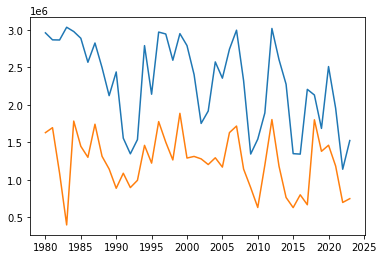

In [140]:
plt.plot(res_df_oroville_new['storage'])
plt.plot(res_df_sanluis_new['storage'])


plt.show()

In [64]:
reservoir_df['Date']

0       12/01/1901
1       01/01/1902
2       02/01/1902
3       03/01/1902
4       04/01/1902
           ...    
1447    07/01/2022
1448    08/01/2022
1449    09/01/2022
1450    10/01/2022
1451    11/01/2022
Name: Date, Length: 1452, dtype: object

In [68]:
pip install datetime

     |████████████████████████████████| 52 kB 1.2 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [69]:
from datetime import datetime

In [86]:
reservoir_df['Date'] = pd.to_datetime(reservoir_df['Date'])
reservoir_df['Date']

0      1901-12-01
1      1902-01-01
2      1902-02-01
3      1902-03-01
4      1902-04-01
          ...    
1447   2022-07-01
1448   2022-08-01
1449   2022-09-01
1450   2022-10-01
1451   2022-11-01
Name: Date, Length: 1452, dtype: datetime64[ns]